In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
transform = transforms.ToTensor()

In [7]:
train_data = datasets.MNIST(root='C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data', train=True, download=True, transform=transform)

In [8]:
test_data = datasets.MNIST(root='C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data', train=False, download=True, transform=transform)

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [11]:
#we want relatively small batches. This also depends on factors such as hardware & size of network
#start small and work into arger

In [12]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True) #batch_size = experiment with the value
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [13]:
#CNN MODEL
#breaks down the convolutional layer & what its doing
#we'll have 2 conv layer within this model
#if kernel_size=3, we'll have 3x3 image kernel, all image kernel need to be square
#coz of how convolution process are

#1 COLOUR CHANNEL, 6 FILTERS (OUTPUT CHANNELS)-arbitrary, 3by3 KERNEL, Stride=1
conv1 = nn.Conv2d(1,6,3,1)
#this 1st layer has input channel 1 coz we're dealing with grayscale image
#6 output channel for feature extraction--the filter that CNN will figure out for us
# kernel size 3= 3x3 filter
#stride 1

#6 input filters Conv2, 16 filters--arbitrary,3by3 kernel size, stride=1
conv2 = nn.Conv2d(6,16,3,1)
#this 2nd layer will take the prev layer result after i passed through pooling fn
#generally yhe conv1 will be expanded into --->6 filters--->pooling--->conv2
#it inherit the conv1 filter which is 6




In [14]:
#grab MNIST record
for i, (X_train, y_train) in enumerate(train_data):
    break

In [15]:
X_train.shape #--->convert into 4D batch (batch of 1 image)

torch.Size([1, 28, 28])

In [16]:
x = X_train.view(1,1,28,28) #--this is how to convert

In [17]:
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [18]:
#pass it into conv layer & pass it through activation fn relu
x = F.relu(conv1(x))

In [19]:
x.shape

torch.Size([1, 6, 26, 26])

In [20]:
#Notice that we have 26x26 instead 28x28--this is coz of the stride/pooling
#we lost information on the border--not a big deal for MNIST data so no padding added
#in real data, its may be important to contain that border info--need padding


In [21]:
#pass through pooling layer
x = F.max_pool2d(x,2,2)

In [22]:
x.shape

torch.Size([1, 6, 13, 13])

In [23]:
#we end up with 13 coz of stride 2 (pooling process)--26is halves

In [24]:
#pass the 2nd conv layer into activation fn
x = F.relu(conv2(x))

In [25]:
x.shape

torch.Size([1, 16, 11, 11])

In [26]:
#pass through max pooling
x = F.max_pool2d(x,2,2)

In [27]:
x.shape #10

torch.Size([1, 16, 5, 5])

In [28]:
# (((28-2)/2)-2)/2 = 5.5--> rounded to 5

In [29]:
#feed to flatten layer
x.view(-1,16*5*5).shape #-1 assume whatever batch size is-dynamic,

torch.Size([1, 400])

In [1]:
#PART 2 ---MODEL CREATION & TRAINING WITH POOLING LAYER IN A CLASS

In [30]:
#Pooling Layer in a class
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10) #120 & 84 are arbitrary--experiment, 10 is fixd since we have 10 num of classes
    
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))  
        X = self.fc3(X)
        return F.log_softmax(X,dim=1)
        

In [31]:
#create model / instance
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [32]:
#CNN with pooling layer should reduce num of parameters
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [33]:
#total 60074 --almost halves than in ANN

In [34]:
#loss fn & optimizer
criterion =  nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
#smaller learning rate will take longer but training will be more
#bigger = faster but less accurate result



In [35]:
#set up training
import time
start_time = time.time()

#VARIABLES (TRACKERS)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []
#FOR LOOP EPOCHS
for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    #TRAIN
    for b,(X_train,y_train) in enumerate(train_loader):
        b +=1
        
        y_pred = model(X_train) #no need to flatted--> we are feeding 2D data coz CNN expects 2d data
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum() #True 1 /False 0 sum()
        trn_corr += batch_corr
        
        #update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 ==0:
            print(f"Epoch: {i} Batch: {b} Loss: {loss.item()}")
            
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
        
    
    #TEST
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f"Training took {total/60} minutes")

Epoch: 0 Batch: 600 Loss: 0.21157124638557434
Epoch: 0 Batch: 1200 Loss: 0.579678475856781
Epoch: 0 Batch: 1800 Loss: 0.05560563877224922
Epoch: 0 Batch: 2400 Loss: 0.0341942124068737
Epoch: 0 Batch: 3000 Loss: 0.010335903614759445
Epoch: 0 Batch: 3600 Loss: 0.005747481714934111
Epoch: 0 Batch: 4200 Loss: 0.053997285664081573
Epoch: 0 Batch: 4800 Loss: 0.0029320730827748775
Epoch: 0 Batch: 5400 Loss: 0.00047731475206092
Epoch: 0 Batch: 6000 Loss: 0.005763170309364796
Epoch: 1 Batch: 600 Loss: 0.03618915006518364
Epoch: 1 Batch: 1200 Loss: 0.331460565328598
Epoch: 1 Batch: 1800 Loss: 0.22193005681037903
Epoch: 1 Batch: 2400 Loss: 0.00852859579026699
Epoch: 1 Batch: 3000 Loss: 0.0009925472550094128
Epoch: 1 Batch: 3600 Loss: 0.1520923674106598
Epoch: 1 Batch: 4200 Loss: 0.019688805565238
Epoch: 1 Batch: 4800 Loss: 0.2398243397474289
Epoch: 1 Batch: 5400 Loss: 0.014966572634875774
Epoch: 1 Batch: 6000 Loss: 0.009659006260335445
Epoch: 2 Batch: 600 Loss: 0.0018652541330084205
Epoch: 2 Batc

In [1]:
#PART 3--MODEL EVALUATION

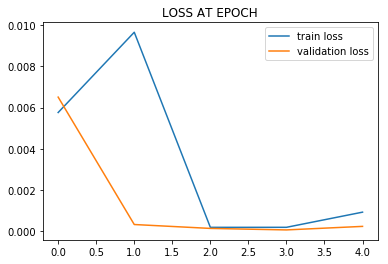

In [40]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='validation loss')
plt.title('LOSS AT EPOCH')
plt.legend()

#the validation is in line with training loss--we expect this

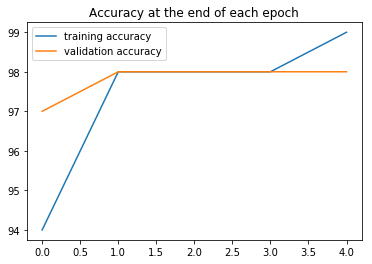

In [39]:
#ACCURACY
plt.plot([t/600 for t in train_correct],label='training accuracy')
plt.plot([t/100 for t in test_correct],label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

#the accuracy seems flattening out even at 2/3 epochs
#epoch 4/5 would probably good to be used to train it
#if more than that, we'll probably won't get much better performance on validation withour overfitting to training dataset
#the ccuracy is great at this point--we reached above 90% accuracy

In [41]:
#evaluate all test data
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [42]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        #Get prediction & we dont have to flatten this
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct  += (predicted == y_test).sum()
        
        

In [44]:
#calc test accuracy
correct.item()/len(test_data)

0.9848

In [45]:
#Recall our ANN returns accuracy of 97.67% after 10 epochs while using 100K parameters
#CNN accuracy 98% after 10 epochs while using 60K parameters (BETTER)

In [48]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 978    0    3    2    0    2    5    1   12    2]
 [   0 1130    8    1    0    0    2    2    0    0]
 [   0    0 1011    2    0    0    1    3    2    0]
 [   0    1    1  998    0    8    0    0    2    3]
 [   0    0    2    0  975    0    3    0    0    4]
 [   0    0    0    4    0  870    1    0    1    2]
 [   1    1    0    0    2    6  945    0    3    1]
 [   0    1    6    1    0    1    0 1004    3    3]
 [   0    2    1    2    1    0    1    0  946    3]
 [   1    0    0    0    4    5    0   18    5  991]]


In [51]:
#run a single image to model & see what it predicts

test_data[2019][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

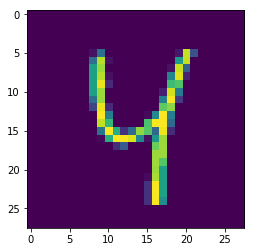

In [62]:
plt.imshow(test_data[2022][0].reshape(28,28))

In [64]:
#grab that single image & pass through model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2022][0].reshape(28,28).view(1,1,28,28))

In [65]:
new_prediction

tensor([[-2.1172e+01, -1.4395e+01, -1.6254e+01, -2.2344e+01, -4.7684e-05,
         -1.8385e+01, -1.4373e+01, -1.6836e+01, -1.4548e+01, -9.9870e+00]])

In [66]:
#grab argmax--the index has the largest value
new_prediction.argmax()

tensor(4)

In [63]:
test_data[2022][1] #we choose 2022=4, prediction from model also shows 4

4